In [383]:
#load libraries for this project
import pandas as pd
import numpy as np
import bea_api_key
import requests, json
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

In [287]:
#personal api key
key = bea_api_key.bea_key

In [288]:
datasets = requests.get('https://apps.bea.gov/api/data?&UserID={}&method=GETDATASETLIST&'.format(key))

In [289]:
#lists all the datasets available through the BEA api -- I believe the dataset we want is the "regional" set
datasets.json()

{'BEAAPI': {'Request': {'RequestParam': [{'ParameterName': 'USERID',
     'ParameterValue': '45BB1816-5B13-4589-A95F-8DD16E38C2C8'},
    {'ParameterName': 'METHOD', 'ParameterValue': 'GETDATASETLIST'},
    {'ParameterName': 'RESULTFORMAT', 'ParameterValue': 'JSON'}]},
  'Results': {'Dataset': [{'DatasetName': 'NIPA',
     'DatasetDescription': 'Standard NIPA tables'},
    {'DatasetName': 'NIUnderlyingDetail',
     'DatasetDescription': 'Standard NI underlying detail tables'},
    {'DatasetName': 'MNE', 'DatasetDescription': 'Multinational Enterprises'},
    {'DatasetName': 'FixedAssets',
     'DatasetDescription': 'Standard Fixed Assets tables'},
    {'DatasetName': 'ITA',
     'DatasetDescription': 'International Transactions Accounts'},
    {'DatasetName': 'IIP',
     'DatasetDescription': 'International Investment Position'},
    {'DatasetName': 'InputOutput', 'DatasetDescription': 'Input-Output Data'},
    {'DatasetName': 'IntlServTrade',
     'DatasetDescription': 'International S

In [290]:
regional_params = requests.get('https://apps.bea.gov/api/data?&UserID={}&method=getparameterlist&datasetname=Regional'.format(key))



In [291]:
regional_params.json()  
    

{'BEAAPI': {'Request': {'RequestParam': [{'ParameterName': 'USERID',
     'ParameterValue': '45BB1816-5B13-4589-A95F-8DD16E38C2C8'},
    {'ParameterName': 'METHOD', 'ParameterValue': 'GETPARAMETERLIST'},
    {'ParameterName': 'DATASETNAME', 'ParameterValue': 'REGIONAL'},
    {'ParameterName': 'RESULTFORMAT', 'ParameterValue': 'JSON'}]},
  'Results': {'Parameter': [{'ParameterName': 'GeoFips',
     'ParameterDataType': 'string',
     'ParameterDescription': 'Comma-delimited list of 5-character geographic codes; COUNTY for all counties, STATE for all states, MSA for all MSAs, MIC for all Micropolitan Areas, PORT for all state metro/nonmetro portions, DIV for all Metropolitan Divisions, CSA for all Combined Statistical Areas, state post office abbreviation for all counties in one state (e.g. NY)',
     'ParameterIsRequiredFlag': '1',
     'MultipleAcceptedFlag': '1'},
    {'ParameterName': 'LineCode',
     'ParameterDataType': 'integer',
     'ParameterDescription': 'Line code for a stati

In [292]:
#get values used in the regional parameter
regional_paramvals_tablename = requests.get('https://apps.bea.gov/api/data?&UserID={}&method=GetParameterValues&datasetname=Regional&ParameterName=TableName'.format(key))


In [293]:
#possible data to gather -- show to team and decide what values we want
regional_paramvals_tablename.json()
    
    
    
    

{'BEAAPI': {'Request': {'RequestParam': [{'ParameterName': 'USERID',
     'ParameterValue': '45BB1816-5B13-4589-A95F-8DD16E38C2C8'},
    {'ParameterName': 'METHOD', 'ParameterValue': 'GETPARAMETERVALUES'},
    {'ParameterName': 'DATASETNAME', 'ParameterValue': 'REGIONAL'},
    {'ParameterName': 'PARAMETERNAME', 'ParameterValue': 'TABLENAME'},
    {'ParameterName': 'RESULTFORMAT', 'ParameterValue': 'JSON'}]},
  'Results': {'ParamValue': [{'Key': 'CAEMP25N',
     'Desc': 'Total full-time and part-time employment by NAICS industry (NAICS)'},
    {'Key': 'CAEMP25S',
     'Desc': 'Total full-time and part-time employment by SIC industry (SIC)'},
    {'Key': 'CAGDP1',
     'Desc': 'County and MSA gross domestic product (GDP) summary (Non-Industry)'},
    {'Key': 'CAGDP11',
     'Desc': 'Contributions to percent change in real GDP (NAICS)'},
    {'Key': 'CAGDP2',
     'Desc': 'Gross domestic product (GDP) by county and metropolitan area (NAICS)'},
    {'Key': 'CAGDP8',
     'Desc': 'Chain-typ

In [10]:
 {'Key': 'CAGDP9',
     'Desc': 'Real GDP by county and metropolitan area (NAICS)'},
    


({'Key': 'CAGDP9',
  'Desc': 'Real GDP by county and metropolitan area (NAICS)'},)

In [294]:
#geofips are locations we can hone in on
regional_paramvals_geofips = requests.get('https://apps.bea.gov/api/data?&UserID={}&method=GetParameterValues&datasetname=Regional&ParameterName=GeoFips'.format(key))



In [295]:
#we want data for every county in the US so we will use key '00000' 
#if we want to get specific by state/county we can request specifics using the given keys
regional_paramvals_geofips.json()

{'BEAAPI': {'Request': {'RequestParam': [{'ParameterName': 'USERID',
     'ParameterValue': '45BB1816-5B13-4589-A95F-8DD16E38C2C8'},
    {'ParameterName': 'METHOD', 'ParameterValue': 'GETPARAMETERVALUES'},
    {'ParameterName': 'DATASETNAME', 'ParameterValue': 'REGIONAL'},
    {'ParameterName': 'PARAMETERNAME', 'ParameterValue': 'GEOFIPS'},
    {'ParameterName': 'RESULTFORMAT', 'ParameterValue': 'JSON'}]},
  'Results': {'ParamValue': [{'Key': '00000', 'Desc': 'United States'},
    {'Key': '00998', 'Desc': 'United States (Metropolitan Portion)'},
    {'Key': '00999', 'Desc': 'United States (Nonmetropolitan Portion)'},
    {'Key': '01000', 'Desc': 'Alabama'},
    {'Key': '01001', 'Desc': 'Autauga'},
    {'Key': '01003', 'Desc': 'Baldwin'},
    {'Key': '01005', 'Desc': 'Barbour'},
    {'Key': '01007', 'Desc': 'Bibb'},
    {'Key': '01009', 'Desc': 'Blount'},
    {'Key': '01011', 'Desc': 'Bullock'},
    {'Key': '01013', 'Desc': 'Butler'},
    {'Key': '01015', 'Desc': 'Calhoun'},
    {'Key':

In [296]:
regional_paramvals_linecode = requests.get('https://apps.bea.gov/api/data?&UserID={}&method=GetParameterValues&datasetname=Regional&ParameterName=LineCode'.format(key))


In [297]:
regional_paramvals_linecode.json()

{'BEAAPI': {'Request': {'RequestParam': [{'ParameterName': 'USERID',
     'ParameterValue': '45BB1816-5B13-4589-A95F-8DD16E38C2C8'},
    {'ParameterName': 'METHOD', 'ParameterValue': 'GETPARAMETERVALUES'},
    {'ParameterName': 'DATASETNAME', 'ParameterValue': 'REGIONAL'},
    {'ParameterName': 'PARAMETERNAME', 'ParameterValue': 'LINECODE'},
    {'ParameterName': 'RESULTFORMAT', 'ParameterValue': 'JSON'}]},
  'Results': {'ParamValue': [{'Key': '1',
     'Desc': '[CAGDP1] Real Gross Domestic Product (GDP)'},
    {'Key': '1',
     'Desc': '[CAGDP11] Contributions to percent change in real GDP: All industry total (percent change)'},
    {'Key': '1',
     'Desc': '[CAGDP2] Gross Domestic Product (GDP): All industry total'},
    {'Key': '1',
     'Desc': '[CAGDP8] Chain-type quantity indexes for real GDP: All industry total'},
    {'Key': '1', 'Desc': '[CAGDP9] Real GDP: All industry total'},
    {'Key': '1', 'Desc': '[CAINC1] Personal income'},
    {'Key': '1', 'Desc': '[CAINC6N] Compensat

In [298]:
#test request 
regional_gdp_test = requests.get('https://apps.bea.gov/api/data?&UserID={}&method=GetData&datasetname=Regional&TableName=CAGDP2&GeoFips=COUNTY&LineCode=1&Year=ALL'.format(key))



In [299]:
#this grabbed gdp all industry total for each county and each year
regional_gdp_test.json()
    
    
    
    

{'BEAAPI': {'Request': {'RequestParam': [{'ParameterName': 'USERID',
     'ParameterValue': '45BB1816-5B13-4589-A95F-8DD16E38C2C8'},
    {'ParameterName': 'METHOD', 'ParameterValue': 'GETDATA'},
    {'ParameterName': 'DATASETNAME', 'ParameterValue': 'REGIONAL'},
    {'ParameterName': 'TABLENAME', 'ParameterValue': 'CAGDP2'},
    {'ParameterName': 'GEOFIPS', 'ParameterValue': 'COUNTY'},
    {'ParameterName': 'LINECODE', 'ParameterValue': '1'},
    {'ParameterName': 'YEAR', 'ParameterValue': 'ALL'},
    {'ParameterName': 'RESULTFORMAT', 'ParameterValue': 'JSON'}]},
  'Results': {'Statistic': 'Gross Domestic Product (GDP): All industry total',
   'UnitOfMeasure': 'Thousands of dollars',
   'PublicTable': 'CAGDP2 Gross domestic product (GDP) by county and metropolitan area',
   'UTCProductionTime': '2023-01-31T20:03:04.720',
   'NoteRef': ' ',
   'Dimensions': [{'Name': 'Code', 'DataType': 'string', 'IsValue': '0'},
    {'Name': 'GeoFips', 'DataType': 'string', 'IsValue': '0'},
    {'Name'

In [300]:
regional_gdp_test_json = regional_gdp_test.json()



In [301]:
regional_gdp_test_json

{'BEAAPI': {'Request': {'RequestParam': [{'ParameterName': 'USERID',
     'ParameterValue': '45BB1816-5B13-4589-A95F-8DD16E38C2C8'},
    {'ParameterName': 'METHOD', 'ParameterValue': 'GETDATA'},
    {'ParameterName': 'DATASETNAME', 'ParameterValue': 'REGIONAL'},
    {'ParameterName': 'TABLENAME', 'ParameterValue': 'CAGDP2'},
    {'ParameterName': 'GEOFIPS', 'ParameterValue': 'COUNTY'},
    {'ParameterName': 'LINECODE', 'ParameterValue': '1'},
    {'ParameterName': 'YEAR', 'ParameterValue': 'ALL'},
    {'ParameterName': 'RESULTFORMAT', 'ParameterValue': 'JSON'}]},
  'Results': {'Statistic': 'Gross Domestic Product (GDP): All industry total',
   'UnitOfMeasure': 'Thousands of dollars',
   'PublicTable': 'CAGDP2 Gross domestic product (GDP) by county and metropolitan area',
   'UTCProductionTime': '2023-01-31T20:03:04.720',
   'NoteRef': ' ',
   'Dimensions': [{'Name': 'Code', 'DataType': 'string', 'IsValue': '0'},
    {'Name': 'GeoFips', 'DataType': 'string', 'IsValue': '0'},
    {'Name'

In [302]:
regional_gdp_test_json_data = regional_gdp_test_json['BEAAPI']['Results']['Data']

In [303]:
regional_gdp_test_json_data

[{'Code': 'CAGDP2-1',
  'GeoFips': '01001',
  'GeoName': 'Autauga, AL',
  'TimePeriod': '2018',
  'CL_UNIT': 'Thousands of dollars',
  'UNIT_MULT': '3',
  'DataValue': '1,808,759'},
 {'Code': 'CAGDP2-1',
  'GeoFips': '01001',
  'GeoName': 'Autauga, AL',
  'TimePeriod': '2009',
  'CL_UNIT': 'Thousands of dollars',
  'UNIT_MULT': '3',
  'DataValue': '1,179,897'},
 {'Code': 'CAGDP2-1',
  'GeoFips': '01001',
  'GeoName': 'Autauga, AL',
  'TimePeriod': '2005',
  'CL_UNIT': 'Thousands of dollars',
  'UNIT_MULT': '3',
  'DataValue': '1,020,385'},
 {'Code': 'CAGDP2-1',
  'GeoFips': '01001',
  'GeoName': 'Autauga, AL',
  'TimePeriod': '2021',
  'CL_UNIT': 'Thousands of dollars',
  'UNIT_MULT': '3',
  'DataValue': '1,862,747'},
 {'Code': 'CAGDP2-1',
  'GeoFips': '01001',
  'GeoName': 'Autauga, AL',
  'TimePeriod': '2020',
  'CL_UNIT': 'Thousands of dollars',
  'UNIT_MULT': '3',
  'DataValue': '1,781,726'},
 {'Code': 'CAGDP2-1',
  'GeoFips': '01001',
  'GeoName': 'Autauga, AL',
  'TimePeriod': '2

In [304]:
#initiate empty lists to move data from dict to df
code_gdp = []
geofips_gdp = []
location_gdp = []
year_gdp = []
unit_gdp = []
unit_mult_gdp = []
value_gdp = []

for i in regional_gdp_test_json_data:
#     print(i)
    code_gdp.append(i['Code'])
    geofips_gdp.append(i['GeoFips'])
    location_gdp.append(i['GeoName'])
    year_gdp.append(i['TimePeriod'])
    unit_gdp.append(i['CL_UNIT'])
    unit_mult_gdp.append(i['UNIT_MULT'])
    value_gdp.append(i['DataValue'])

In [305]:
len(code_gdp)

65478

In [306]:
regional_gdp_df = pd.DataFrame(code_gdp, columns = ['code'])
regional_gdp_df['geofips'] = geofips_gdp
regional_gdp_df['location'] = location_gdp
regional_gdp_df['year'] = year_gdp
regional_gdp_df['unit'] = unit_gdp
regional_gdp_df['unit_mult'] = unit_mult_gdp
regional_gdp_df['value'] = value_gdp

In [307]:
regional_gdp_df.head()

,code,geofips,location,year,unit,unit_mult,value
0,CAGDP2-1,01001,"Autauga, AL",2018,Thousands of dollars,3,"1,808,759"
1,CAGDP2-1,01001,"Autauga, AL",2009,Thousands of dollars,3,"1,179,897"
2,CAGDP2-1,01001,"Autauga, AL",2005,Thousands of dollars,3,"1,020,385"
3,CAGDP2-1,01001,"Autauga, AL",2021,Thousands of dollars,3,"1,862,747"
4,CAGDP2-1,01001,"Autauga, AL",2020,Thousands of dollars,3,"1,781,726"


In [308]:
regional_gdp_df.tail()

,code,geofips,location,year,unit,unit_mult,value
65473,CAGDP2-1,56045,"Weston, WY",2005,Thousands of dollars,3,"251,138"
65474,CAGDP2-1,56045,"Weston, WY",2003,Thousands of dollars,3,"185,337"
65475,CAGDP2-1,56045,"Weston, WY",2014,Thousands of dollars,3,"278,892"
65476,CAGDP2-1,56045,"Weston, WY",2001,Thousands of dollars,3,"171,990"
65477,CAGDP2-1,56045,"Weston, WY",2012,Thousands of dollars,3,"329,709"


In [309]:
#find the rows with 2 commas in the location 
def count_commas(column):
    count = 0
    for item in column:
        count += item.count(',')
    return count

loc_commas = []

for i, row in enumerate(regional_gdp_df['location']):
    if count_commas(row) == 2:
        loc_commas.append(i)

In [310]:
def split_string(string):
    split_list = string.split(',')
    if len(split_list) >= 2:
        # split based on the first comma
        first_part = split_list[0]
        second_part = split_list[1]
        print(second_part)
    else:
        # split based on the second comma
        first_part = split_list[0]
        second_part = None
    return first_part, second_part

def split_column_first(series):
    return series.str.split(',').apply(lambda x: split_string(x[0]))

def split_column_second(series):
    return series.str.split(',').apply(lambda x: split_string(x[1]))

def add_split_columns(df, column_name):
    split_result_first = split_column_first(df[column_name])
    split_result_second = split_column_second(df[column_name])
    df['first_part_county'] = split_result_first.apply(lambda x: x[0])
    df['second_part_county'] = split_result_second.apply(lambda x: x[0])
    return df

In [311]:
add_split_columns(regional_gdp_df, 'location')

,code,geofips,location,year,unit,unit_mult,value,first_part_county,second_part_county
0,CAGDP2-1,01001,"Autauga, AL",2018,Thousands of dollars,3,"1,808,759",Autauga,AL
1,CAGDP2-1,01001,"Autauga, AL",2009,Thousands of dollars,3,"1,179,897",Autauga,AL
2,CAGDP2-1,01001,"Autauga, AL",2005,Thousands of dollars,3,"1,020,385",Autauga,AL
3,CAGDP2-1,01001,"Autauga, AL",2021,Thousands of dollars,3,"1,862,747",Autauga,AL
4,CAGDP2-1,01001,"Autauga, AL",2020,Thousands of dollars,3,"1,781,726",Autauga,AL
...,...,...,...,...,...,...,...,...,...
65473,CAGDP2-1,56045,"Weston, WY",2005,Thousands of dollars,3,"251,138",Weston,WY
65474,CAGDP2-1,56045,"Weston, WY",2003,Thousands of dollars,3,"185,337",Weston,WY
65475,CAGDP2-1,56045,"Weston, WY",2014,Thousands of dollars,3,"278,892",Weston,WY
65476,CAGDP2-1,56045,"Weston, WY",2001,Thousands of dollars,3,"171,990",Weston,WY


In [312]:
#split location into county and state columns using the comma delimiter -- issues with virgina having commas in county name
regional_gdp_df['state'] = regional_gdp_df['location'].str.split(',', expand=True)[2]

regional_gdp_df['state'] = regional_gdp_df['state'].fillna(regional_gdp_df['location'].str.split(',', expand=True)[1])

#some states still have a * next to their name
regional_gdp_df['state'].unique()

regional_gdp_df['state'] = regional_gdp_df['state'].replace('\\*','', regex=True)


In [313]:
# find matching values between second_part_county and state
mask = regional_gdp_df['second_part_county'] == regional_gdp_df['state']

# change values in col2 where mask is True to NaN
regional_gdp_df.loc[mask, 'second_part_county'] = 'NA'

regional_gdp_df = regional_gdp_df.replace('NA', float('NaN'))

regional_gdp_df['county'] = regional_gdp_df.apply(lambda x: str(x['first_part_county']) + str(x['second_part_county']) if pd.notna(x['second_part_county']) and pd.notna(x['first_part_county']) else str(x['first_part_county']) if pd.notna(x['first_part_county']) else str(x['second_part_county']), axis=1)


In [314]:
regional_gdp_df

,code,geofips,location,year,unit,unit_mult,value,first_part_county,second_part_county,state,county
0,CAGDP2-1,01001,"Autauga, AL",2018,Thousands of dollars,3,"1,808,759",Autauga,NaN,AL,Autauga
1,CAGDP2-1,01001,"Autauga, AL",2009,Thousands of dollars,3,"1,179,897",Autauga,NaN,AL,Autauga
2,CAGDP2-1,01001,"Autauga, AL",2005,Thousands of dollars,3,"1,020,385",Autauga,NaN,AL,Autauga
3,CAGDP2-1,01001,"Autauga, AL",2021,Thousands of dollars,3,"1,862,747",Autauga,NaN,AL,Autauga
4,CAGDP2-1,01001,"Autauga, AL",2020,Thousands of dollars,3,"1,781,726",Autauga,NaN,AL,Autauga
...,...,...,...,...,...,...,...,...,...,...,...
65473,CAGDP2-1,56045,"Weston, WY",2005,Thousands of dollars,3,"251,138",Weston,NaN,WY,Weston
65474,CAGDP2-1,56045,"Weston, WY",2003,Thousands of dollars,3,"185,337",Weston,NaN,WY,Weston
65475,CAGDP2-1,56045,"Weston, WY",2014,Thousands of dollars,3,"278,892",Weston,NaN,WY,Weston
65476,CAGDP2-1,56045,"Weston, WY",2001,Thousands of dollars,3,"171,990",Weston,NaN,WY,Weston


In [316]:
test = regional_gdp_df.iloc[loc_commas]

In [317]:
test

,code,geofips,location,year,unit,unit_mult,value,first_part_county,second_part_county,state,county
61068,CAGDP2-1,51907,"Augusta, Staunton + Waynesboro, VA*",2011,Thousands of dollars,3,"4,589,040",Augusta,Staunton + Waynesboro,VA,Augusta Staunton + Waynesboro
61069,CAGDP2-1,51907,"Augusta, Staunton + Waynesboro, VA*",2013,Thousands of dollars,3,"4,774,561",Augusta,Staunton + Waynesboro,VA,Augusta Staunton + Waynesboro
61070,CAGDP2-1,51907,"Augusta, Staunton + Waynesboro, VA*",2010,Thousands of dollars,3,"4,687,327",Augusta,Staunton + Waynesboro,VA,Augusta Staunton + Waynesboro
61071,CAGDP2-1,51907,"Augusta, Staunton + Waynesboro, VA*",2007,Thousands of dollars,3,"4,088,724",Augusta,Staunton + Waynesboro,VA,Augusta Staunton + Waynesboro
61072,CAGDP2-1,51907,"Augusta, Staunton + Waynesboro, VA*",2020,Thousands of dollars,3,"5,367,957",Augusta,Staunton + Waynesboro,VA,Augusta Staunton + Waynesboro
...,...,...,...,...,...,...,...,...,...,...,...
61378,CAGDP2-1,51945,"Rockbridge, Buena Vista + Lexington, VA*",2009,Thousands of dollars,3,"1,058,531",Rockbridge,Buena Vista + Lexington,VA,Rockbridge Buena Vista + Lexington
61379,CAGDP2-1,51945,"Rockbridge, Buena Vista + Lexington, VA*",2001,Thousands of dollars,3,"823,038",Rockbridge,Buena Vista + Lexington,VA,Rockbridge Buena Vista + Lexington
61380,CAGDP2-1,51945,"Rockbridge, Buena Vista + Lexington, VA*",2012,Thousands of dollars,3,"1,104,019",Rockbridge,Buena Vista + Lexington,VA,Rockbridge Buena Vista + Lexington
61381,CAGDP2-1,51945,"Rockbridge, Buena Vista + Lexington, VA*",2003,Thousands of dollars,3,"901,029",Rockbridge,Buena Vista + Lexington,VA,Rockbridge Buena Vista + Lexington


In [320]:
regional_gdp_df = regional_gdp_df.drop(['first_part_county','second_part_county'], axis = 1)

In [321]:
regional_gdp_df.head(10)

,code,geofips,location,year,unit,unit_mult,value,state,county
0,CAGDP2-1,01001,"Autauga, AL",2018,Thousands of dollars,3,"1,808,759",AL,Autauga
1,CAGDP2-1,01001,"Autauga, AL",2009,Thousands of dollars,3,"1,179,897",AL,Autauga
2,CAGDP2-1,01001,"Autauga, AL",2005,Thousands of dollars,3,"1,020,385",AL,Autauga
3,CAGDP2-1,01001,"Autauga, AL",2021,Thousands of dollars,3,"1,862,747",AL,Autauga
4,CAGDP2-1,01001,"Autauga, AL",2020,Thousands of dollars,3,"1,781,726",AL,Autauga
5,CAGDP2-1,01001,"Autauga, AL",2019,Thousands of dollars,3,"1,784,796",AL,Autauga
6,CAGDP2-1,01001,"Autauga, AL",2001,Thousands of dollars,3,"755,902",AL,Autauga
7,CAGDP2-1,01001,"Autauga, AL",2006,Thousands of dollars,3,"1,130,144",AL,Autauga
8,CAGDP2-1,01001,"Autauga, AL",2007,Thousands of dollars,3,"1,192,292",AL,Autauga
9,CAGDP2-1,01001,"Autauga, AL",2016,Thousands of dollars,3,"1,793,087",AL,Autauga


In [322]:
#119 rows with (NA) value fill to 0 and then use avg 
regional_gdp_df[regional_gdp_df['value'] == '(NA)']

,code,geofips,location,year,unit,unit_mult,value,state,county
1512,CAGDP2-1,02063,"Chugach Census Area, AK*",2009,Thousands of dollars,3,(NA),AK,Chugach Census Area AK*
1513,CAGDP2-1,02063,"Chugach Census Area, AK*",2005,Thousands of dollars,3,(NA),AK,Chugach Census Area AK*
1514,CAGDP2-1,02063,"Chugach Census Area, AK*",2018,Thousands of dollars,3,(NA),AK,Chugach Census Area AK*
1515,CAGDP2-1,02063,"Chugach Census Area, AK*",2019,Thousands of dollars,3,(NA),AK,Chugach Census Area AK*
1517,CAGDP2-1,02063,"Chugach Census Area, AK*",2006,Thousands of dollars,3,(NA),AK,Chugach Census Area AK*
...,...,...,...,...,...,...,...,...,...
2074,CAGDP2-1,02280,"Wrangell-Petersburg Census Area, AK*",2014,Thousands of dollars,3,(NA),AK,Wrangell-Petersburg Census Area AK*
2075,CAGDP2-1,02280,"Wrangell-Petersburg Census Area, AK*",2011,Thousands of dollars,3,(NA),AK,Wrangell-Petersburg Census Area AK*
2076,CAGDP2-1,02280,"Wrangell-Petersburg Census Area, AK*",2012,Thousands of dollars,3,(NA),AK,Wrangell-Petersburg Census Area AK*
2077,CAGDP2-1,02280,"Wrangell-Petersburg Census Area, AK*",2017,Thousands of dollars,3,(NA),AK,Wrangell-Petersburg Census Area AK*


In [362]:
#remove comma and fill na values with state avg gdp and convert to numeric

regional_gdp_df['value'] = regional_gdp_df['value'].replace(',','', regex=True)

regional_gdp_df['value'] = regional_gdp_df['value'].replace('(NA)',np.nan, regex=True)

regional_gdp_df['value'] = pd.to_numeric(regional_gdp_df['value'])

regional_gdp_df['value'] = regional_gdp_df['value'].fillna(regional_gdp_df.groupby('geofips')['value'].transform('mean'))

regional_gdp_df['state'] = regional_gdp_df['state'].str.replace(' ', '')


In [363]:
#group by state and see the avg gdp by state/year
grouped_df = regional_gdp_df.groupby(['state','year']).agg(mean_gdp_per_state_year = ('value', 'mean'))

In [364]:
#remove scientific notation
def to_full_value(x):
    return format(x, 'f')

grouped_df['mean_gdp_per_state_year'] = grouped_df['mean_gdp_per_state_year'].apply(to_full_value)

In [365]:
grouped_df = grouped_df.reset_index()

In [366]:
grouped_df['mean_gdp_per_state_year'] = pd.to_numeric(grouped_df['mean_gdp_per_state_year'])

In [367]:
#lets just do 1 state to not crowd the dataframe
cali = grouped_df[grouped_df['state'] == 'CA']

In [368]:
grouped_df[grouped_df['state'] == 'CA']

,state,year,mean_gdp_per_state_year
84,CA,2001,2.372002e+07
85,CA,2002,2.445568e+07
86,CA,2003,2.582618e+07
87,CA,2004,2.738237e+07
88,CA,2005,2.928552e+07
89,CA,2006,3.124500e+07
90,CA,2007,3.273969e+07
91,CA,2008,3.352923e+07
92,CA,2009,3.258907e+07
93,CA,2010,3.369125e+07


Text(0.5, 1.0, 'Mean GDP By Year In California')

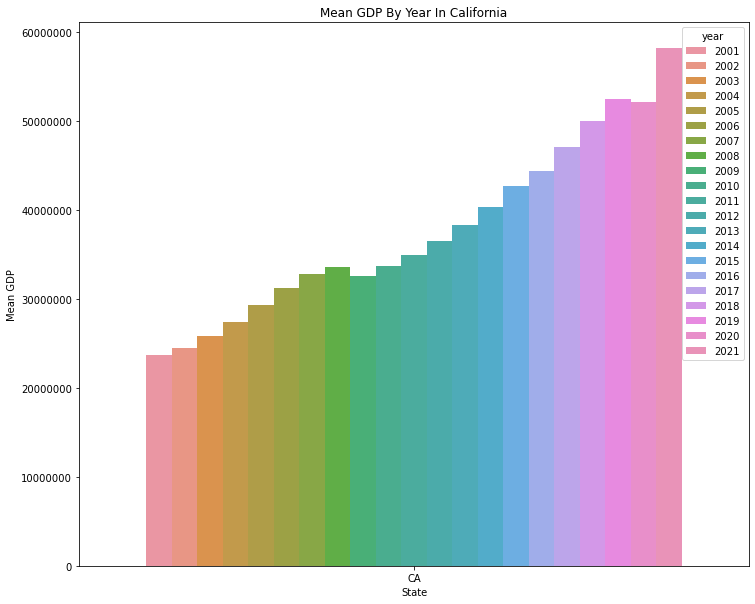

In [386]:
# plot barplot
plt.figure(figsize=(12, 10))

cali_gdp = sns.barplot(x = 'state',
           y = 'mean_gdp_per_state_year',
           hue = 'year',
           data = cali)
cali_gdp.yaxis.get_major_formatter().set_scientific(False)
cali_gdp.set_ylabel('Mean GDP')
cali_gdp.set_xlabel('State')
cali_gdp.set_title('Mean GDP By Year In California')

In [387]:
grouped_df

,state,year,mean_gdp_per_state_year
0,AK,2001,9.175888e+05
1,AK,2002,9.547297e+05
2,AK,2003,1.021820e+06
3,AK,2004,1.117835e+06
4,AK,2005,1.266487e+06
...,...,...,...
1066,WY,2017,1.607854e+06
1067,WY,2018,1.703115e+06
1068,WY,2019,1.714263e+06
1069,WY,2020,1.579582e+06


In [397]:
#removing DC for this next visualization
regional_gdp_df_minus_dc = regional_gdp_df[regional_gdp_df['state'] != 'DC' & regional_gdp_df['year'] == 2021]

TypeError: Cannot perform 'rand_' with a dtyped [object] array and scalar of type [bool]

In [402]:
grouped_df = regional_gdp_df_minus_dc.groupby(['state']).agg(mean_gdp_per_state_year = ('value', 'mean'))
top_5 = grouped_df['mean_gdp_per_state_year'].nlargest(5)
top_5 = top_5.reset_index()

Text(0.5, 1.0, 'Top 5 Avg GDP From 2021')

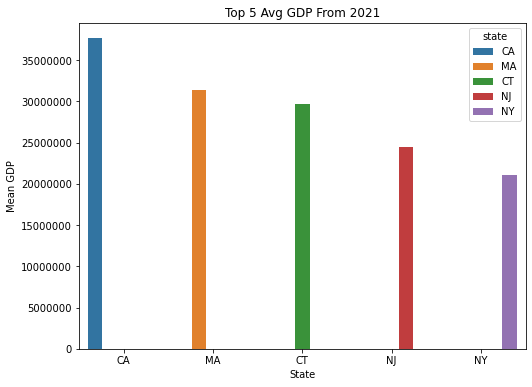

In [404]:
# plot barplot
plt.figure(figsize=(8, 6))

top_gdp = sns.barplot(x = 'state',
           y = 'mean_gdp_per_state_year',
           hue = 'state',
           data = top_5)
top_gdp.yaxis.get_major_formatter().set_scientific(False)
top_gdp.set_ylabel('Mean GDP')
top_gdp.set_xlabel('State')
top_gdp.set_title('Top 5 Avg GDP From 2021')